## Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load Data

In [92]:
data=pd.read_csv('Country clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Plot Data

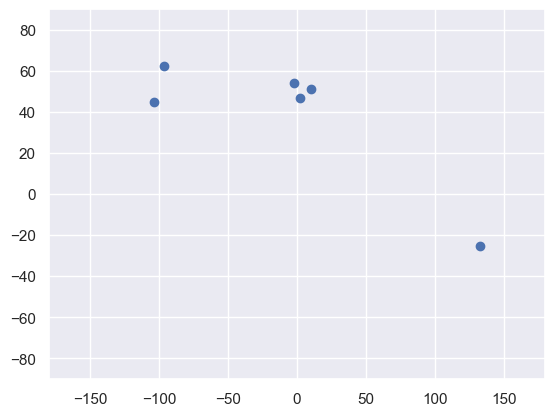

In [93]:
plt.scatter(data ['Longitude'], data ['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Feature selection

In [94]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering (Number of clusters)

In [95]:
kmeans= KMeans (3)
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering Results -(fit_predict) 

In [96]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [97]:
data_with_clusters= data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


#observe how clusters have been grouped by northern and southern hemosphere

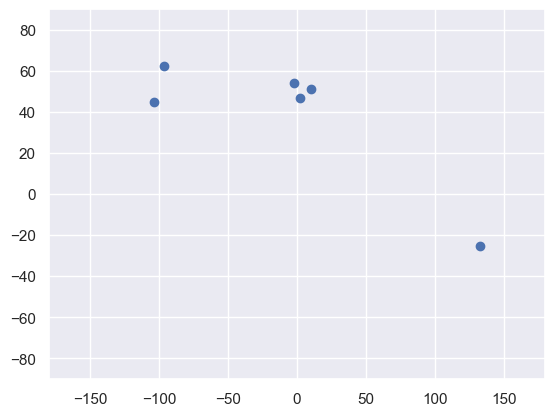

In [98]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Colouring the clusters

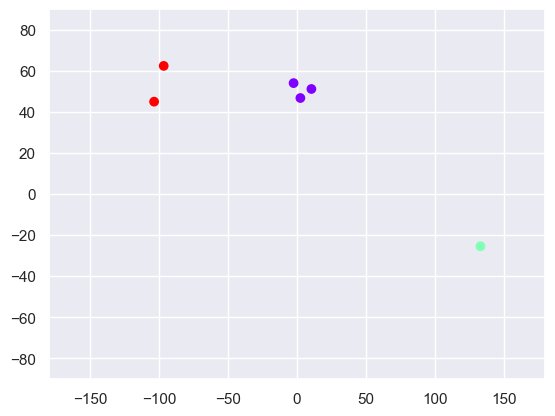

In [99]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map data using categorical data

In [100]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0, 'French':1, 'German':2,})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features 

In [101]:
x= data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [102]:
kmenas= KMeans(2)
kmenas.fit(x)

KMeans(n_clusters=2)

## Clustering Results -(fit_predict) 

In [103]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [104]:
data_with_clusters= data.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


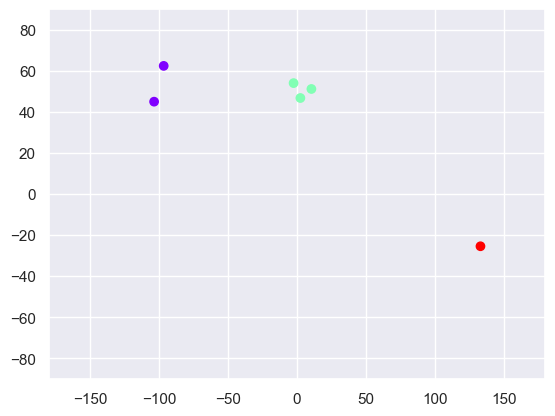

In [105]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Elbow method - choosing how many clusters (within clusters sum of squares - WCSS)

In [106]:
kmeans.inertia_

290.1052333333333

In [110]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter= kmeans.inertia_
    wcss.append(wcss_iter)

In [111]:
wcss


[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within clusters sum of squares')

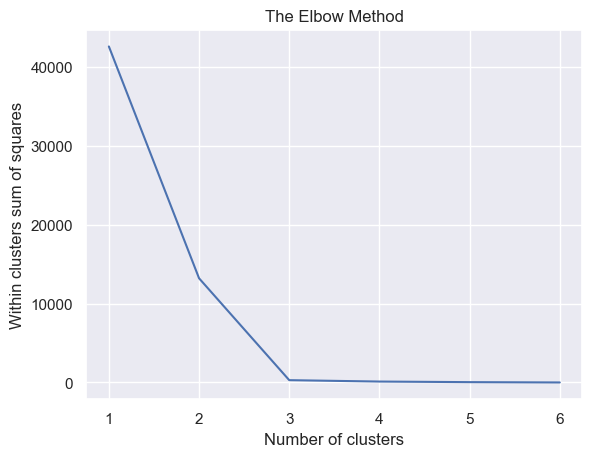

In [112]:
number_clusters= range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within clusters sum of squares')

### Kmeans is sentsitive to initialisation - use KMeans ++
### KMeans is sensitive to outliers - remove when possible 